In [2]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=d00ee312f4d4aa1a0483d6ca4e9aa1c2ee8daa2620b0eead5e0863c6d9746f86
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [3]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [4]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
startsWithDateAndTime('7/26/18, 22:51 - Bobby: This message was deleted')

True

In [6]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [7]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [8]:
from google.colab import files
uploaded = files.upload()
data = [] # List to keep track of data so it can be used by a Pandas dataframe
parsedData = []
conversation = 'WhatsApp Chat with Erasmus LAquila 2022 1.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Saving WhatsApp Chat with Erasmus LAquila 2022 1.txt to WhatsApp Chat with Erasmus LAquila 2022 1.txt


In [9]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
731,2022-07-18,13:55,None,+39 333 776 9318 changed to +49 1573 1075559
732,2022-07-18,22:37,None,+49 1573 1075559 changed to +39 333 776 9318
733,2022-07-20,23:44,None,+39 389 933 0711 changed to +389 72 760 964
734,2022-07-21,13:25,+380 95 164 1320,Hi everybody Has anyone got the tessera sanita...
735,2022-07-21,13:32,None,+380 95 164 1320 changed to +39 347 646 0318
736,2022-07-21,17:52,+351 925 114 818,"Hi everyone, today is my last day in L'Aquila,..."
737,2022-07-21,19:31,+351 936 025 885,Papi😭
738,2022-07-22,02:56,+380 95 202 2250,<Media omitted>
739,2022-07-22,02:56,+380 95 202 2250,<Media omitted>
740,2022-07-22,02:56,+380 95 202 2250,<Media omitted>


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     751 non-null    datetime64[ns]
 1   Time     751 non-null    object        
 2   Author   699 non-null    object        
 3   Message  751 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.6+ KB


In [11]:
df.Author.unique()

array([None, '+39 338 164 7956', 'Francesco Onorati ESN',
       '+39 351 577 2673', 'Andrea Innamorati ESN Volunteer',
       '+39 328 924 6337', '+34 626 25 35 21',
       'Chiara Parisse UNIVAQ Erasmus', '+39 349 662 8967',
       'Jeetesh Gupta AVV UL, ITALY', '+380 63 648 4480',
       '+380 95 202 2250', '+380 96 802 9829', '+39 329 128 7668',
       '+380 96 989 3292', '+39 349 598 0907', '+380 95 185 0199',
       '+33 6 58 75 83 18', '+48 692 360 500', '+39 351 972 7569',
       '+351 926 583 871', '+233 27 160 4611', '+90 542 410 01 39',
       '+39 347 827 5586', '+34 646 40 34 03', '+34 674 31 06 28',
       '+380 97 019 8499', 'Payel Patra Col AVV', '+91 98850 38869',
       '+49 1511 9613055', 'Arianna Pasqualone ESN Italy',
       'Claudia Pasqua ESN', '+39 389 618 1905', 'Aishwarya Naik',
       '+351 915 401 307', '+39 351 956 9624', '+39 348 701 8221',
       '+380 63 770 5586', '+385 91 558 1880', '+39 349 448 2882',
       '+34 684 11 43 77', '+39 351 726 1030', '+3

In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 2 to 750
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     699 non-null    datetime64[ns]
 1   Time     699 non-null    object        
 2   Author   699 non-null    object        
 3   Message  699 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 27.3+ KB


In [13]:
total_messages = df.shape[0]
print(total_messages)

699


In [14]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

172


# Tokenization

In [28]:
def split_count(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
      emojis = emoji.distinct_emoji_list(word)
      emoji_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [30]:
emojis = sum(df['emoji'].str.len())
print(emojis)

703


## Stemming & Lemmatization

In [31]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [33]:
links = np.sum(df.urlcount)
print(links)

15


In [34]:
print("L'Aquila Erasmus")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

L'Aquila Erasmus
Messages: 699
Media: 172
Emojis: 703
Links: 15


In [37]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [38]:
messages_df = df.drop(media_messages_df.index)

In [39]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 2 to 737
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      527 non-null    datetime64[ns]
 1   Time      527 non-null    object        
 2   Author    527 non-null    object        
 3   Message   527 non-null    object        
 4   emoji     527 non-null    object        
 5   urlcount  527 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 28.8+ KB


In [40]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [42]:
messages_df.tail(20)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
700,2022-05-07,18:07,Chiara Parisse UNIVAQ Erasmus,This message was deleted,[],0,24,4,1
701,2022-07-07,16:47,+351 936 025 885,Hello everyone! We are going to have a final p...,[],1,261,44,1
704,2022-09-07,14:51,+351 936 025 885,Hey everyone. I hope everyone is Alive from ye...,"[:face_with_tears_of_joy:, :face_with_tears_of...",0,143,27,1
705,2022-09-07,17:38,+380 95 185 0199,"Don Bosco is closed, we move to collemagio",[],0,42,8,1
708,2022-07-13,17:18,Andrea Innamorati ESN Volunteer,guys for those one who need the refund of the ...,[],0,248,47,1
710,2022-07-14,00:04,+34 626 25 35 21,🥰🥰🥰🥰🥰,"[:smiling_face_with_hearts:, :smiling_face_wit...",0,5,1,1
711,2022-07-14,00:04,+34 626 25 35 21,🎂,[:birthday_cake:],0,1,1,1
713,2022-07-14,00:05,+33 6 58 75 83 18,Happy birthday 🥳,[:partying_face:],0,16,3,1
717,2022-07-14,00:12,"Jeetesh Gupta AVV UL, ITALY",Happy people ❤️,[:red_heart:],0,15,3,1
722,2022-07-14,08:42,+39 388 629 8755,Auguriiii @393313890191 😍😍,"[:smiling_face_with_heart-eyes:, :smiling_face...",0,27,4,1


In [43]:
l = ["Jeetesh Gupta AVV UL, ITALY", "Arianna Pasqualone ESN Italy", "Andrea Innamorati ESN Volunteer"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()


Stats of Jeetesh Gupta AVV UL, ITALY -
Messages Sent 21
Words per message 3.8095238095238093
Media Messages Sent 16
Emojis Sent 29
Links Sent 0

Stats of Arianna Pasqualone ESN Italy -
Messages Sent 12
Words per message 16.333333333333332
Media Messages Sent 6
Emojis Sent 45
Links Sent 0

Stats of Andrea Innamorati ESN Volunteer -
Messages Sent 25
Words per message 15.96
Media Messages Sent 8
Emojis Sent 53
Links Sent 0



In [44]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

135


In [45]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

(':red_heart:', 95)
(':fire:', 84)
(':Ukraine:', 42)
(':rolling_on_the_floor_laughing:', 36)
(':smiling_face_with_heart-eyes:', 36)
(':star-struck:', 27)
(':eyes:', 26)
(':kiss_mark:', 20)
(':loudly_crying_face:', 20)
(':smiling_face_with_hearts:', 18)
(':face_with_tears_of_joy:', 17)
(':smirking_face:', 17)
(':heart_on_fire:', 16)
(':sparkles:', 7)
(':musical_notes:', 7)
(':sparkling_heart:', 7)
(':winking_face:', 6)
(':two_hearts:', 6)
(':partying_face:', 6)
(':rainbow:', 6)
(':trophy:', 6)
(':face_screaming_in_fear:', 5)
(':victory_hand_light_skin_tone:', 5)
(':fireworks:', 4)
(':smiling_face_with_sunglasses:', 4)
(':Spain:', 4)
(':crying_face:', 4)
(':flexed_biceps:', 4)
(':upside-down_face:', 4)
(':smiling_face_with_tear:', 4)
(':face_with_open_mouth:', 4)
(':grinning_face_with_smiling_eyes:', 3)
(':confetti_ball:', 3)
(':beaming_face_with_smiling_eyes:', 3)
(':pouting_face:', 3)
(':woman_rowing_boat_light_skin_tone:', 3)
(':backhand_index_pointing_down:', 3)
(':shushing_face:', 3

In [46]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,:red_heart:,95
1,:fire:,84
2,:Ukraine:,42
3,:rolling_on_the_floor_laughing:,36
4,:smiling_face_with_heart-eyes:,36
...,...,...
130,:speak-no-evil_monkey:,1
131,:monkey:,1
132,:grinning_face:,1
133,:smiling_face_with_open_hands:,1


In [ ]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 28832 words in all the messages.


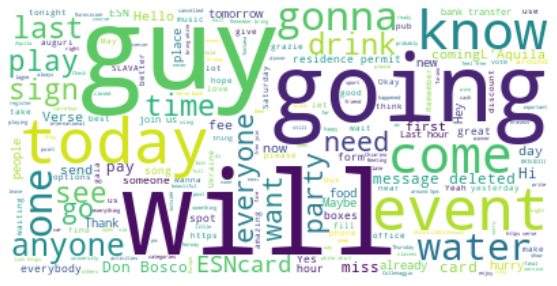

In [47]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Jeetesh Gupta AVV UL, ITALY


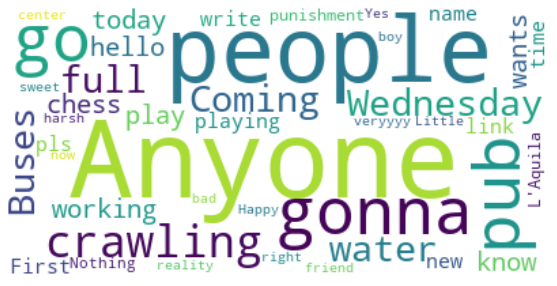

Author name Arianna Pasqualone ESN Italy


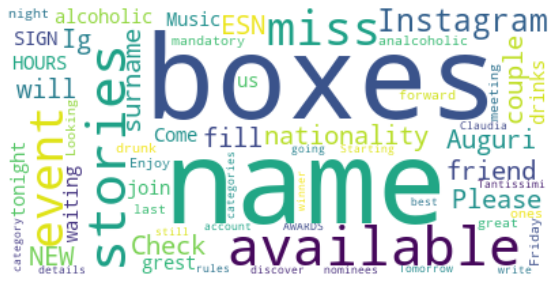

Author name Andrea Innamorati ESN Volunteer


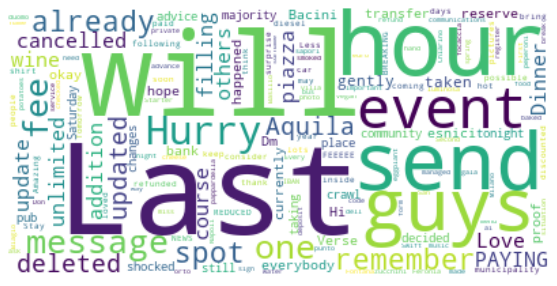

In [48]:
l = ["Jeetesh Gupta AVV UL, ITALY", "Arianna Pasqualone ESN Italy", "Andrea Innamorati ESN Volunteer"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()